In [1]:
import pandas as pd
import os

In [4]:
df_population_raw = pd.read_csv('population_total.csv')

In [5]:
df_population_raw

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


In [7]:
# Dropping null values
df_population_raw.dropna(inplace=True)

In [9]:
# Making a pivot table
df_pivot = df_population_raw.pivot(index='year', 
                        columns='country', 
                        values='population')

In [11]:
df_pivot = df_pivot[['United States', 'India', 'China', 'Mexico', 'Brazil']]

In [12]:
df_pivot

country,United States,India,China,Mexico,Brazil
year,,,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08,32350596.0,62533919.0
1960.0,186720571.0,4.505477e+08,6.604081e+08,37771859.0,72179226.0
1965.0,199733676.0,4.991233e+08,7.242190e+08,44123853.0,83373530.0
1970.0,209513341.0,5.551898e+08,8.276014e+08,51493565.0,95113265.0
1975.0,219081251.0,6.231029e+08,9.262409e+08,59607953.0,107216205.0
1980.0,229476354.0,6.989528e+08,1.000089e+09,67761372.0,120694009.0
1985.0,240499825.0,7.843600e+08,1.075589e+09,75983485.0,135274080.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,83943132.0,149003223.0
1995.0,265163745.0,9.639226e+08,1.240921e+09,91663285.0,162019896.0


## Visualizations in Pandas
1. Line Chart

<Axes: title={'center': 'Population from 1955 to 2020'}, xlabel='Year', ylabel='Population'>

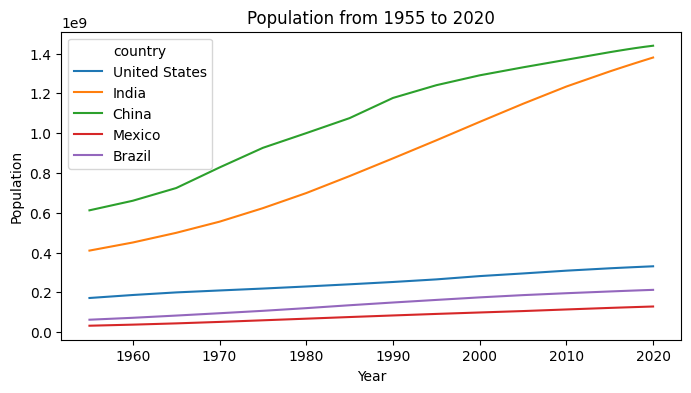

In [19]:
df_pivot.plot(kind='line', 
              xlabel='Year', 
              ylabel='Population', 
              title='Population from 1955 to 2020',
              figsize=(8,4))

2. Bar Chart

In [21]:
# Selecting only one year (2020)
df_pivot_2020 = df_pivot[df_pivot.index.isin([2020])]

In [22]:
# Showing new dataframe
df_pivot_2020

country,United States,India,China,Mexico,Brazil
year,,,,,
2020.0,331002651.0,1.380004e+09,1.439324e+09,128932753.0,212559417.0


In [26]:
# Transpose dataframe from rows to columns or vice-versa
df_pivot_2020 = df_pivot_2020.T

In [27]:
df_pivot_2020

year,2020.0
country,
United States,3.310027e+08
India,1.380004e+09
China,1.439324e+09
Mexico,1.289328e+08
Brazil,2.125594e+08


<Axes: title={'center': 'Population in 2020'}, xlabel='Country', ylabel='Population'>

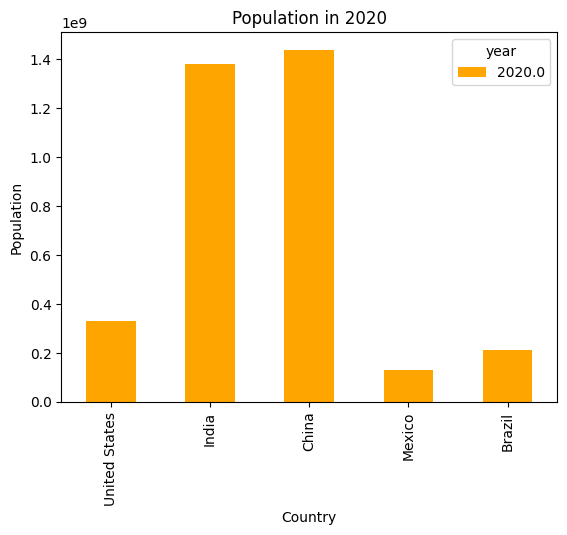

In [30]:
df_pivot_2020.plot(kind='bar', color='orange',
                   xlabel='Country', 
                   ylabel='Population', 
                   title='Population in 2020')

### Barplot grouped by 'n' variables

In [31]:
# Selecting a few years
df_pivot_sample = df_pivot[df_pivot.index.isin([1980, 1990, 2000, 2010, 2020])]

<Axes: title={'center': 'Population from 1980 to 2020'}, xlabel='Year', ylabel='Population'>

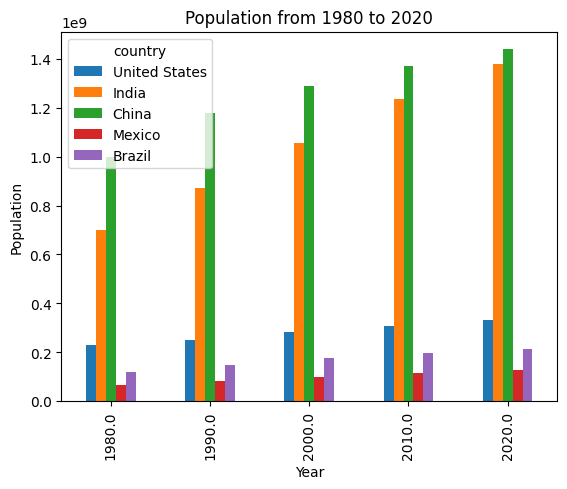

In [35]:
df_pivot_sample.plot(kind='bar', xlabel='Year',
                     ylabel='Population',
                     title="Population from 1980 to 2020")

### Pie Charts

<Axes: title={'center': 'Population Distribution in 2020'}, ylabel='2020'>

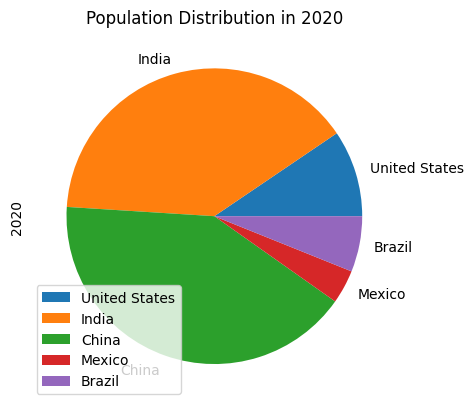

In [42]:
# Changing column name to string
df_pivot_2020.rename(columns={2020: '2020'}, inplace=True)
df_pivot_2020.plot(kind='pie', y='2020', xlabel='Country', title='Population Distribution in 2020')

# Saving Plots and Export

In [49]:
import matplotlib as plt

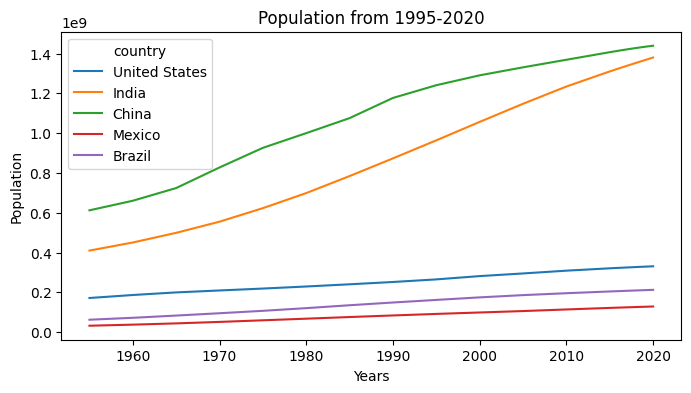

In [57]:
#Lineplot
df_pivot.plot(kind='line',
              xlabel='Years', ylabel='Population',
              title="Population from 1995-2020",
              figsize=(8,4))

# Save the graphics in an image file
plt.pyplot.savefig('my_test.png')
# Show plot
plt.pyplot.show()

In [60]:
# Export to excel
df_pivot.to_excel('Pivot_table.xlsx')